In [1]:
import csv
import os

import cartopy.crs as ccrs
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt

In [42]:
def write_par(path, par):
    """
    Prepare a "par file" to be read by one of the OCSSW tools, as an
    alternative to specifying each parameter on the command line.

    Args:
        path (str): where to write the parameter file
        par (dict): the parameter names and values included in the file
    """
    with open(path, "w") as file:
        writer = csv.writer(file, delimiter="=")
        values = writer.writerows(par.items())

In [43]:
help(write_par)

Help on function write_par in module __main__:

write_par(path, par)
    Prepare a "par file" to be read by one of the OCSSW tools, as an
    alternative to specifying each parameter on the command line.

    Args:
        path (str): where to write the parameter file
        par (dict): the parameter names and values included in the file



In [4]:
auth = earthaccess.login(persist=True)

In [35]:
credentials = earthaccess.get_s3_credentials(provider="OB_CLOUD")

In [36]:
tspan = ("2024-05-01", "2024-05-01")
location = (6.6, 5.2)

In [37]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L1B_SCI",
    temporal=tspan,
    point=location,
)
results[0]

Collection: {'Version': '3', 'ShortName': 'PACE_OCI_L1B_SCI'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 18.29274, 'Longitude': 25.57779}, {'Latitude': 13.2657, 'Longitude': 1.08638}, {'Latitude': -4.56215, 'Longitude': 5.23644}, {'Latitude': 0.4651, 'Longitude': 28.84368}, {'Latitude': 18.29274, 'Longitude': 25.57779}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-05-01T11:58:11Z', 'BeginningDateTime': '2024-05-01T11:53:12Z'}}
Size(MB): 1775.7943420410156
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501T115312.L1B.V3.nc']

In [38]:
ifile = results[0].data_links(access="direct")[0]
ifile

's3://ob-cumulus-prod-public/PACE_OCI.20240501T115312.L1B.V3.nc'

In [39]:
f = earthaccess.open([ifile], provider="OB_CLOUD")

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

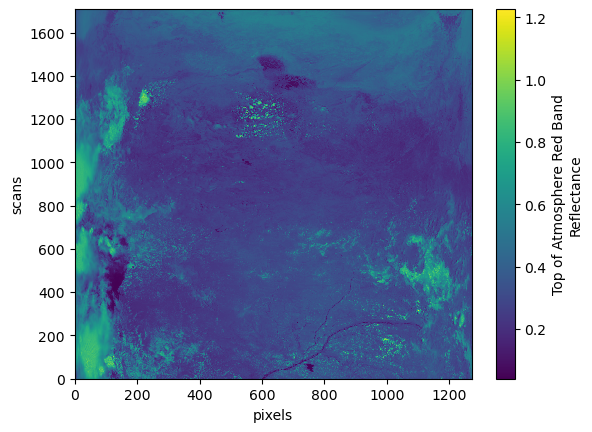

In [40]:
dataset = xr.open_dataset(f[0], group="observation_data")
plot = dataset["rhot_red"][dict(red_bands=100)].plot()

In [44]:
ocsswroot = os.environ.setdefault("OCSSWROOT", "/tmp/ocssw")
env = Path(ocsswroot, "OCSSW_bash.env")
env.exists()

NameError: name 'Path' is not defined

In [18]:
paths = earthaccess.download(results, local_path="L1B_data")

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
l2gen_ifile = paths[0]

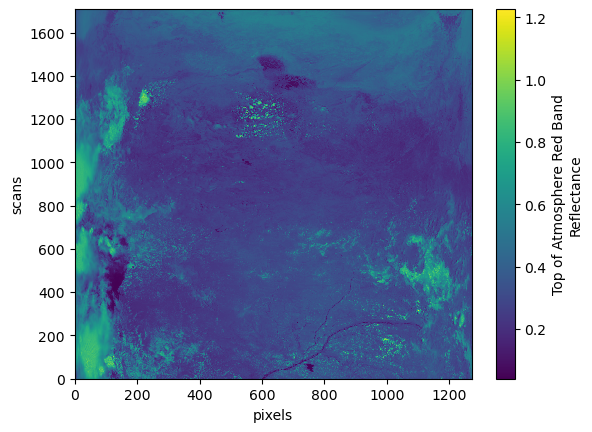

In [30]:
dataset = xr.open_dataset(l2gen_ifile, group="observation_data")
artist = dataset["rhot_red"].sel({"red_bands": 100}).plot()

In [31]:
os.environ.setdefault("OCSSWROOT", "/opt/ocssw")

'/opt/ocssw'

In [32]:
%%bash
source $OCSSWROOT/OCSSW_bash.env

l2gen help

bash: line 1: /opt/ocssw/OCSSW_bash.env: No such file or directory
bash: line 3: l2gen: command not found


CalledProcessError: Command 'b'source $OCSSWROOT/OCSSW_bash.env\n\nl2gen help\n'' returned non-zero exit status 127.